In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
import matplotlib as mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

In [85]:
movie_data=pd.read_excel(r'E:\Movie_Top250\dataSet\movieData.xlsx',header=1,index_col=0)

In [86]:
movie_data

,rank,movieName,movieShortShow,Introduction,director,mainActor,score,year,type,country,language,review,starFive,starFour,starThree,starTwo,starOne
0,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,希望让人自由。,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,919450,82.2%,15.6%,2.0%,0.1%,0.1%
2,2,霸王别姬,风华绝代。,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,陈凯歌,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷...,9.5,1993,剧情 / 爱情 / 同性,中国大陆 / 香港,汉语普通话,663562,79.4%,17.7%,2.7%,0.2%,0.1%
3,3,这个杀手不太冷,怪蜀黍和小萝莉不得不说的故事。,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,873050,73.8%,22.5%,3.4%,0.2%,0.1%
4,4,阿甘正传,一部美国近现代史。,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,742728,73.9%,22.2%,3.5%,0.2%,0.1%
5,5,美丽人生,最美的谎言。,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔...,9.5,1997,剧情 / 喜剧 / 爱情 / 战争,意大利,意大利语 / 德语 / 英语,433722,77.5%,19.3%,2.9%,0.2%,0.1%
6,6,千与千寻,最好的宫崎骏，最好的久石让。,千寻和爸爸妈妈一同驱车前往新家，在郊外的小路上不慎进入了神秘的隧道——他们去到了另外一个诡异...,宫崎骏,柊瑠美 / 入野自由 / 夏木真理 / 菅原文太 / 内藤刚志 / 神木隆之介 / 泽口靖...,9.2,2001,剧情 / 动画 / 奇幻,日本,日语,692912,67.5%,27.2%,5.0%,0.2%,0.1%
7,7,辛德勒的名单,拯救一个人，就是拯救整个世界。,1939年，波兰在纳粹德国的统治下，党卫军对犹太人进行了隔离统治。德国商人奥斯卡·辛德勒（连...,史蒂文·斯皮尔伯格,连姆·尼森 / 本·金斯利 / 拉尔夫·费因斯 / 卡罗琳·古多尔 / 乔纳森·萨加尔 /...,9.4,1993,剧情 / 历史 / 战争,美国,英语 / 希伯来语 / 德语 / 波兰语,398474,74.5%,22.0%,3.2%,0.2%,0.1%
8,8,泰坦尼克号,失去的才是永恒的。,1912年4月10日，号称“世界工业史上的奇迹”的豪华客轮泰坦尼克号开始了自己的处女航，从英...,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费...,9.2,1997,剧情 / 爱情 / 灾难,美国,英语 / 意大利语 / 德语 / 俄语,682987,67.6%,26.2%,5.7%,0.3%,0.1%
9,9,盗梦空间,诺兰给了我们一场无法盗取的梦。,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦...,9.3,2010,剧情 / 动作 / 科幻 / 悬疑 / 冒险,美国 / 英国,英语 / 日语 / 法语,791794,68.2%,26.8%,4.7%,0.3%,0.1%


In [92]:
f=lambda x:float(x.strip('%'))/100
movie_data['avgStar']=5*movie_data['starFive'].map(f)+4*movie_data['starFour'].map(f)+3*movie_data['starThree'].map(f)+2*movie_data['starTwo'].map(f)+movie_data['starOne'].map(f)

In [93]:
movie_data.head()

,rank,movieName,movieShortShow,Introduction,director,mainActor,score,year,type,country,language,review,starFive,starFour,starThree,starTwo,starOne,avg_star,avgStar
0,,,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,希望让人自由。,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,919450,82.2%,15.6%,2.0%,0.1%,0.1%,4.797,4.797
2,2,霸王别姬,风华绝代。,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,陈凯歌,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷...,9.5,1993,剧情 / 爱情 / 同性,中国大陆 / 香港,汉语普通话,663562,79.4%,17.7%,2.7%,0.2%,0.1%,4.764,4.764
3,3,这个杀手不太冷,怪蜀黍和小萝莉不得不说的故事。,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,873050,73.8%,22.5%,3.4%,0.2%,0.1%,4.697,4.697
4,4,阿甘正传,一部美国近现代史。,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,742728,73.9%,22.2%,3.5%,0.2%,0.1%,4.693,4.693
5,5,美丽人生,最美的谎言。,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔...,9.5,1997,剧情 / 喜剧 / 爱情 / 战争,意大利,意大利语 / 德语 / 英语,433722,77.5%,19.3%,2.9%,0.2%,0.1%,4.739,4.739


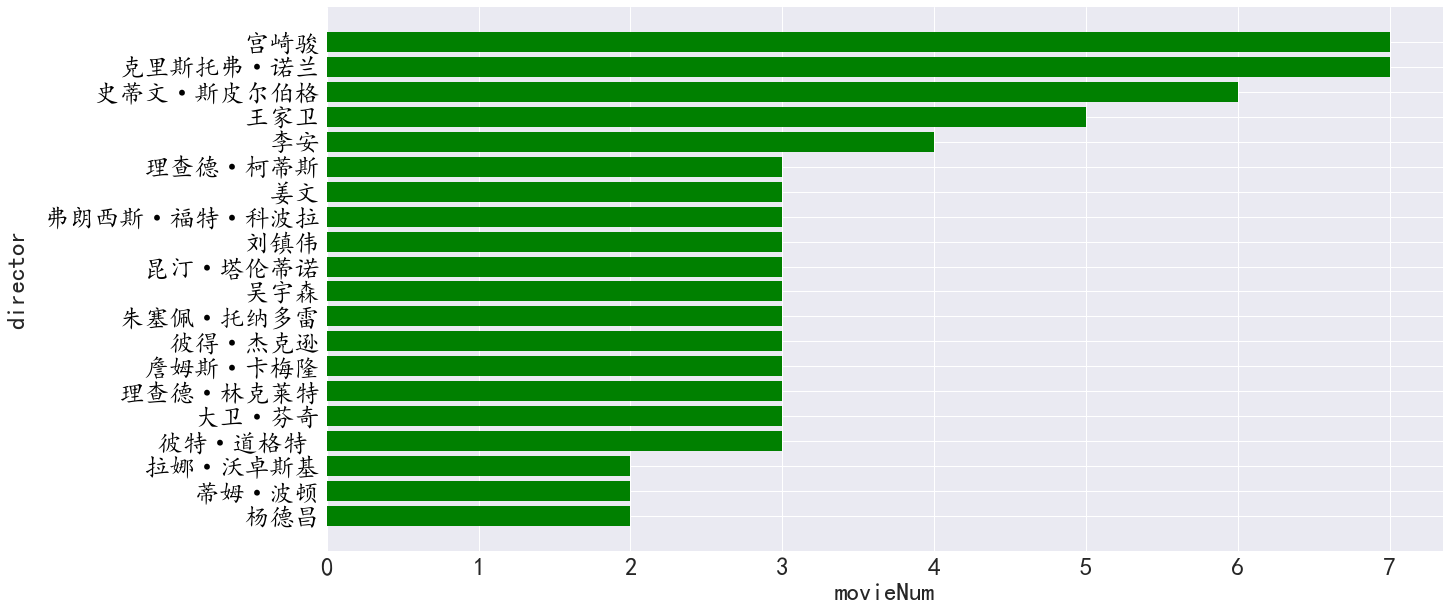

In [94]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
directors=list(movie_data['director'])
dir_dict = {}
for director in directors:
    director_array=director.split('/')
    for item in director_array:
        dir_dict[item]=dir_dict.get(item,0)+1
dir_pd=pd.DataFrame.from_dict(dir_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,8),size=25)
ax.invert_yaxis()
ax.set_xlabel('movieNum',size=25)
ax.set_ylabel('director',size=25)

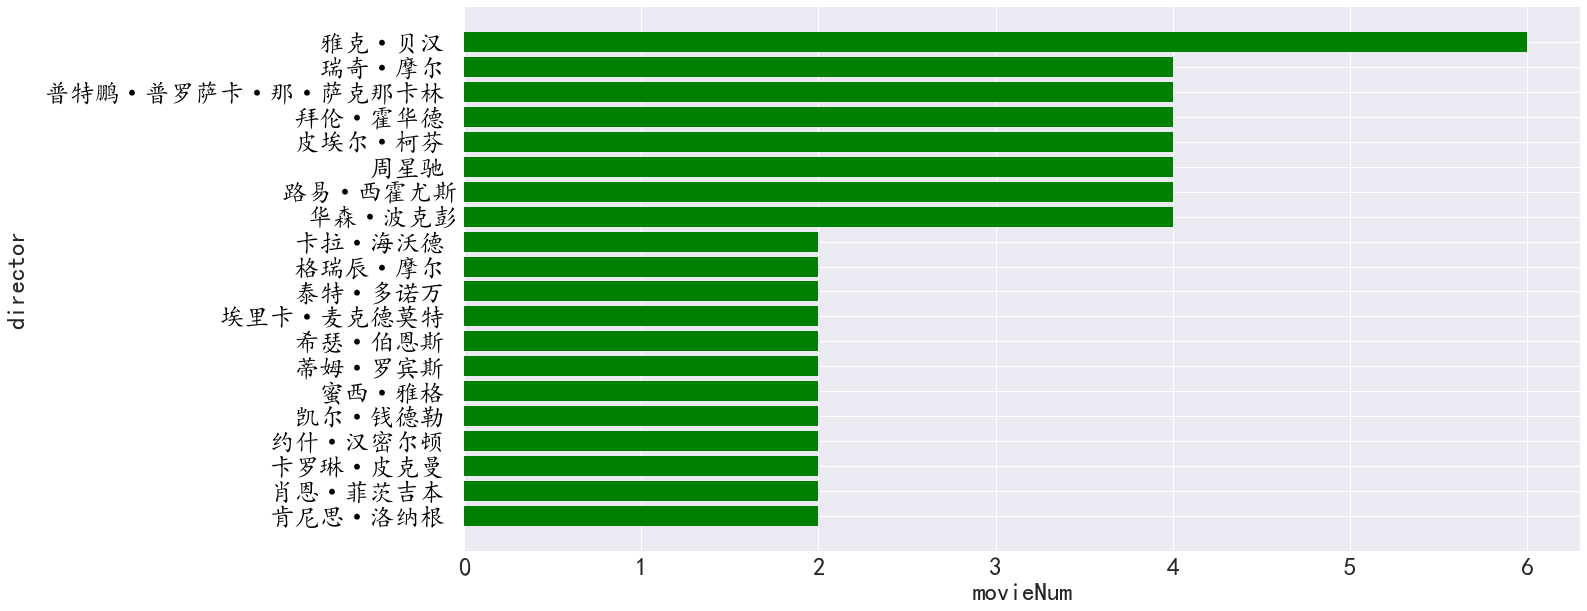

In [95]:
font = {'family' : 'serif',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 25,  
        }  
acts=list(movie_data['mainActor'])
act_dict = {}
for act in acts:
    try:
        act_array=act.split('/')
        for item in act_array:
            act_dict[item]=dir_dict.get(item,0)+1
    except Exception as e:
        print(e)
dir_pd=pd.DataFrame.from_dict(act_dict,orient='index')
dir_pd.columns=['count']
dir_pd['per']=dir_pd['count']/sum(dir_pd['count'])
dir_pd.sort_values(['count'],axis=0,inplace=True,ascending=False)
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.barh(np.arange(1,21),dir_pd['count'][:20], color='green',ecolor='black')
ax.set_yticks(np.arange(1,21))
ax.set_yticklabels(dir_pd.index[:20],fontdict=font)
ax.set_xticklabels(np.arange(0,100),size=25)
ax.invert_yaxis()
ax.set_xlabel('movieNum',size=25)
ax.set_ylabel('director',size=25)

In [96]:
data=pd.DataFrame(movie_data.groupby(['year']).agg({'rank':'count','score':'mean','avgStar':'mean'}))

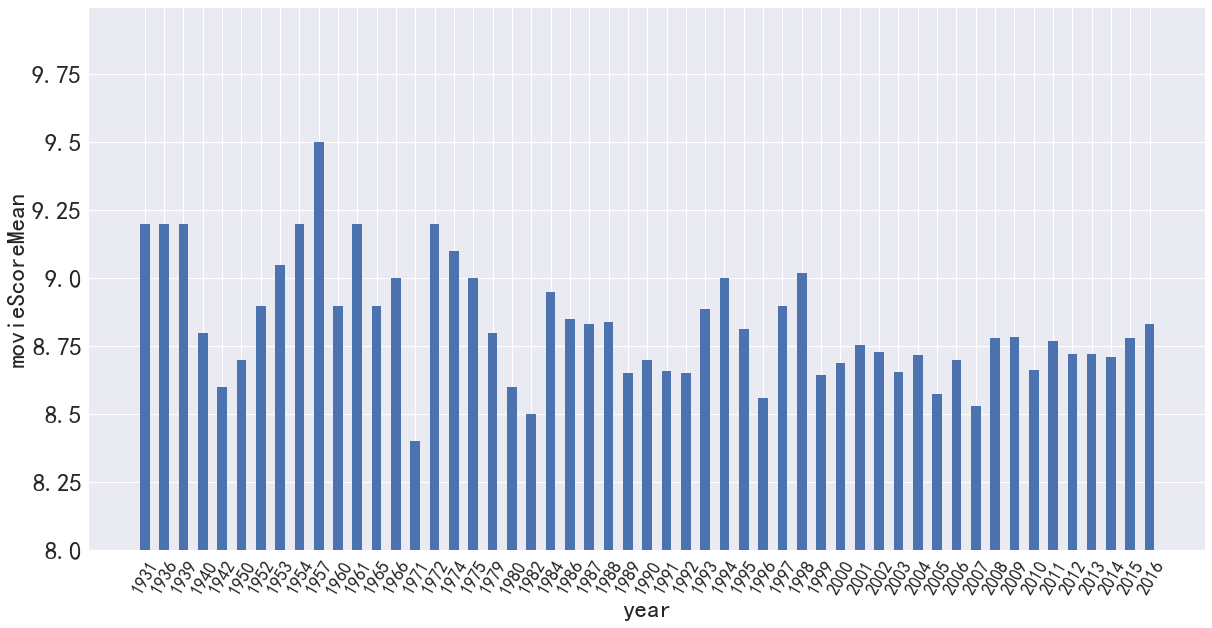

In [97]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.bar(np.arange(len(data.index)),data['score'],width=0.5)
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(data.index,size=18,rotation=60)
plt.ylim(8,10)
ax.set_yticklabels(np.arange(8,10,0.25),size=25)
ax.set_xlabel('year',size=25)
ax.set_ylabel('movieScoreMean',size=25)

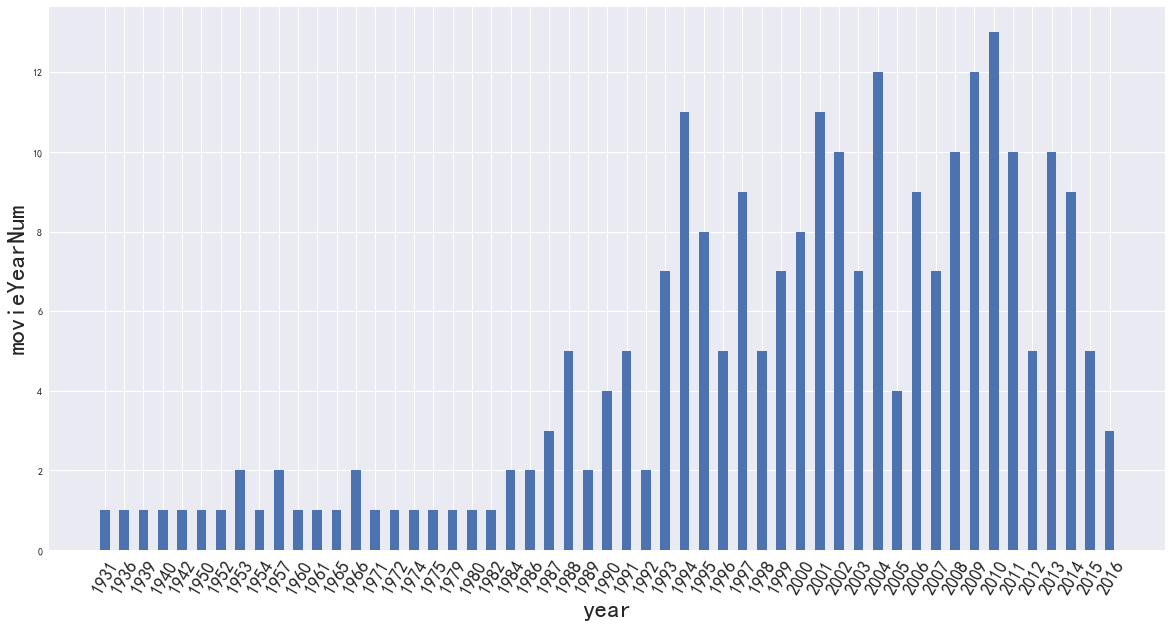

In [98]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.bar(np.arange(len(data.index)),data['rank'],width=0.5)
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(data.index,size=18,rotation=60)
ax.set_xlabel('year',size=25)
ax.set_ylabel('movieYearNum',size=25)

In [71]:
movie_data[movie_data['year']==1994]

,rank,movie_name,director,main_actor,score,year,type,country,language,Introduction,review,star_five,star_four,star_three,star_two,star_one,avg_star
0,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,918864,82.2%,15.6%,2.0%,0.1%,0.1%,4.797
3,3,这个杀手不太冷,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,872569,73.8%,22.5%,3.4%,0.2%,0.1%,4.697
4,4,阿甘正传,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,742289,73.9%,22.2%,3.5%,0.2%,0.1%,4.693
32,34,活着,张艺谋,葛优 / 巩俐 / 姜武 / 牛犇 / 郭涛 / 张璐 / 倪大红 / 肖聪 / 董飞 /...,9.1,1994,剧情 / 家庭 / 历史,中国大陆 / 香港,汉语普通话,根据余华同名小说改编。 富少福贵（葛优）嗜赌成性，妻子家珍（巩俐）屡劝无果后带着女儿凤霞离...,278712,61.2%,32.0%,6.3%,0.4%,0.1%,4.538
53,55,饮食男女,李安,吴倩莲 / 杨贵媚 / 王渝文 / 郎雄 / 张艾嘉 / 归亚蕾 / 赵文瑄 / 陈昭荣,9.1,1994,剧情 / 家庭,台湾 / 美国,汉语普通话 / 闽南语 / 湖南话,台湾中国菜硕果仅存的大师老朱（郎雄）退休后，渐尝老年生活的诸多尴尬：每周日费心做出的一桌丰盛...,204065,59.2%,34.7%,5.8%,0.3%,0.1%,4.529
56,58,狮子王,罗杰·阿勒斯 / 罗伯·明可夫,乔纳森·泰勒·托马斯 / 马修·布罗德里克 / 杰瑞米·艾恩斯 / 詹姆斯·厄尔·琼斯 /...,8.9,1994,剧情 / 动画 / 歌舞 / 家庭 / 冒险,美国,英语 / 斯瓦希里语 / 科萨语 / 祖鲁语,辛巴是狮子王国的小王子，他的父亲穆法沙是一个威严的国王。然而叔叔刀疤却对穆法沙的王位觊觎已久...,287466,54.2%,36.3%,9.1%,0.3%,0.1%,4.442
65,67,低俗小说,昆汀·塔伦蒂诺,约翰·特拉沃尔塔 / 乌玛·瑟曼 / 阿曼达·普拉莫 / 蒂姆·罗斯 / 塞缪尔·杰克逊 ...,8.8,1994,剧情 / 喜剧 / 犯罪,美国,英语 / 西班牙语 / 法语,《低俗小说》由“文森特和马沙的妻子”、“金表”、“邦妮的处境”三个故事以及影片首尾的序幕和尾...,340543,51.4%,36.6%,10.7%,1.0%,0.3%,4.378
79,81,阳光灿烂的日子,姜文,夏雨 / 宁静 / 陶虹 / 耿乐 / 斯琴高娃 / 冯小刚 / 姜文 / 王学圻 / 王...,8.7,1994,剧情,中国大陆 / 香港,汉语普通话,20世纪70年代初的北京，忙着“闹革命”大人无空理会小孩，加上学校停课无事可做，以军队大院男...,273339,48.8%,40.3%,10.2%,0.6%,0.1%,4.371
81,83,重庆森林,王家卫,林青霞 / 金城武 / 梁朝伟 / 王菲 / 周嘉玲,8.7,1994,剧情 / 爱情,香港,粤语 / 汉语普通话 / 英语 / 印地语 / 日语,编号为223的警察（金城武）失恋后患上失恋综合症，在与金发女杀手（林青霞）擦肩而过又离奇相遇...,333827,46.9%,40.2%,11.7%,0.9%,0.3%,4.325


In [74]:
movie_data[movie_data['year']==2010]

,rank,movie_name,director,main_actor,score,year,type,country,language,Introduction,review,star_five,star_four,star_three,star_two,star_one,avg_star
0,,,,,,,,,,,,,,,,,
9,9,盗梦空间,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦...,9.3,2010,剧情 / 动作 / 科幻 / 悬疑 / 冒险,美国 / 英国,英语 / 日语 / 法语,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,791423,68.2%,26.8%,4.7%,0.3%,0.1%,4.630
26,28,怦然心动,罗伯·莱纳,玛德琳·卡罗尔 / 卡兰·麦克奥利菲 / 瑞贝卡·德·莫妮 / 安东尼·爱德华兹 / 约翰...,8.9,2010,剧情 / 喜剧 / 爱情,美国,英语,布莱斯（卡兰•麦克奥利菲CallanMcAuliffe饰）全家搬到小镇，邻家女孩朱丽（玛德琳...,571980,55.8%,35.0%,8.6%,0.6%,0.1%,4.461
75,77,让子弹飞,姜文,姜文 / 葛优 / 周润发 / 刘嘉玲 / 陈坤 / 张默 / 姜武 / 周韵 / 廖凡 ...,8.7,2010,剧情 / 喜剧 / 动作 / 西部,中国大陆 / 香港,汉语普通话 / 四川话 / 山西话,民国年间，花钱捐得县长的马邦德（葛优饰）携妻（刘嘉玲饰）及随从走马上任。途经南国某地，遭劫匪...,630299,49.8%,36.9%,11.6%,1.2%,0.5%,4.343
84,86,禁闭岛,马丁·斯科塞斯,莱昂纳多·迪卡普里奥 / 马克·鲁弗洛 / 本·金斯利 / 马克斯·冯·叙多夫 / 米歇尔...,8.6,2010,剧情 / 悬疑 / 惊悚,美国,英语 / 德语,本片根据美国小说家丹尼斯·勒翰（DennisLehane）的同名小说改编。1954年，联邦警...,363053,44.2%,44.3%,10.6%,0.7%,0.2%,4.316
92,94,告白,中岛哲也,松隆子 / 冈田将生 / 木村佳乃 / 西井幸人 / 桥本爱 / 芦田爱菜 / 三吉彩花 ...,8.7,2010,剧情 / 惊悚,日本,日语,一所平凡的中学，1年B组即将迎来春假。不知天高地厚的学生们肆意吵闹，殊不知一场绵亘数月的风暴...,345366,48.8%,38.0%,11.2%,1.4%,0.6%,4.330
109,111,驯龙高手,迪恩·德布洛斯 / 克里斯·桑德斯,杰伊·巴鲁切尔 / 杰拉德·巴特勒 / 克雷格·费格森 / 亚美莉卡·费雷拉 / 乔纳·希...,8.7,2010,喜剧 / 动画 / 家庭 / 奇幻 / 冒险,美国,英语,维京岛国的少年小嗝嗝（杰伊•巴鲁切尔JayBaruchel配音）是部落统领伟大的斯托里克（杰...,284713,45.6%,42.2%,11.4%,0.6%,0.1%,4.323
117,119,岁月神偷,罗启锐,吴君如 / 任达华 / 钟绍图 / 李治廷 / 蔡颖恩 / 秦沛 / 夏萍 / 谷德昭 /...,8.6,2010,剧情 / 家庭,香港 / 中国大陆,粤语 / 汉语普通话 / 英语 / 上海话 / 法语,60年代的香港，风云变幻。一面要忍受港英政府的压制，一面又受到内地运动的波及，更要面对不时登...,307396,45.6%,40.9%,12.4%,0.9%,0.2%,4.308
118,120,神偷奶爸,皮埃尔·柯芬 / 克里斯·雷纳德,史蒂夫·卡瑞尔 / 杰森·席格尔 / 拉塞尔·布兰德 / 朱莉·安德鲁斯 / 威尔·阿奈特...,8.5,2010,喜剧 / 动画 / 冒险,美国 / 法国,英语,超级坏蛋格鲁（史蒂夫·卡瑞尔SteveCarell配音）在听说埃及金字塔被盗的新闻后不满市面...,374608,40.3%,45.5%,13.3%,0.8%,0.1%,4.251
119,121,借东西的小人阿莉埃蒂,米林宏昌,志田未来 / 神木隆之介 / 树木希林 / 三浦友和 / 大竹忍 / 竹下景子 / 藤原龙也,8.7,2010,动画 / 奇幻 / 冒险,日本,日语,虽然患有心脏方面的疾病，但是少年翔（神木隆之介配音）的父母依然对他疏于呵护。为了准备即将到来...,215977,46.3%,41.8%,11.3%,0.5%,0.1%,4.337


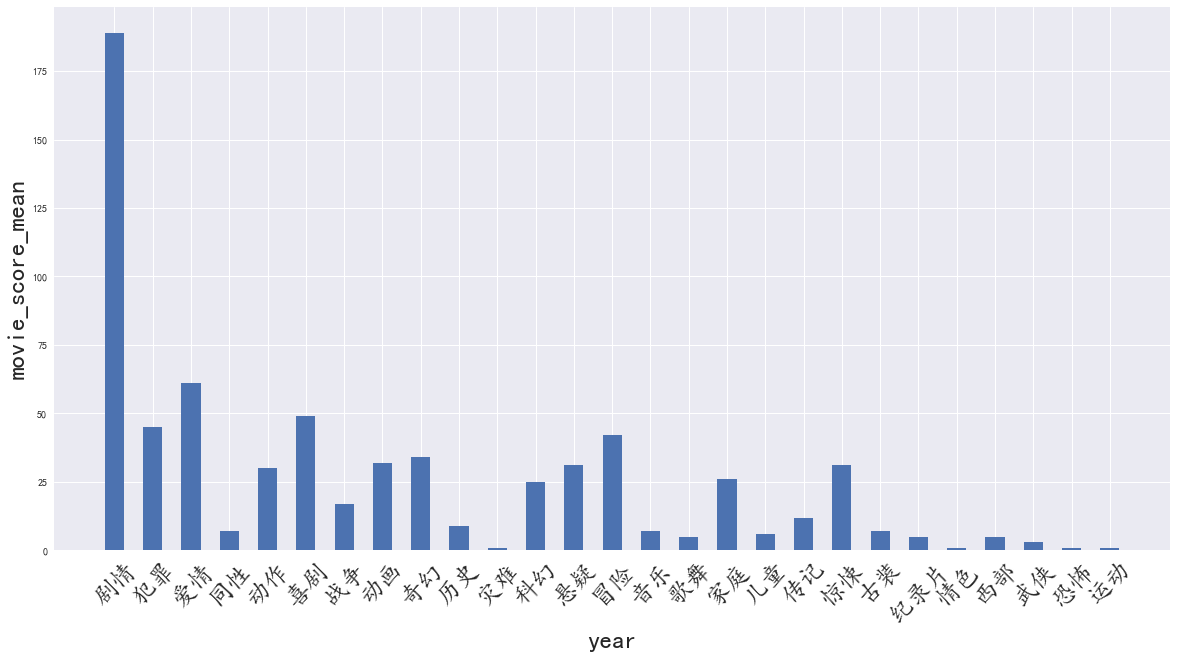

In [29]:
type_list=list(movie_data['type'])
type_dict = {}
for type_ in type_list:
    try:
        type_array=type_.split('/')
        for item in type_array:
            type_dict[item.strip()]=type_dict.get(item.strip(),0)+1
    except Exception as e:
        print(e)
type_pd=pd.DataFrame.from_dict(type_dict,orient='index')
type_pd.columns=['count']
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.bar(np.arange(len(type_pd.index)),type_pd['count'],width=0.5)
ax.set_xticks(np.arange(len(type_pd.index)))
ax.set_xticklabels(type_pd.index,size=25,rotation=45)
ax.set_xlabel('year',size=25)
ax.set_ylabel('movie_score_mean',size=25)


In [37]:
import jieba.analyse

In [99]:
from functools import reduce 
g=lambda x,y:x.replace('\u3000','')+y.replace('\u3000','')
m=reduce(g,movie_data['movieShortShow'])

In [100]:
result=jieba.analyse.textrank(m,topK=50,withWeight=True)
keywords = dict()
for i in result:
    keywords[i[0]]=i[1]
print(keywords)

{'电影': 1.0, '人生': 0.6596970483787314, '天使': 0.5272024149514638, '科幻': 0.5167713298317325, '世界': 0.5078238439496638, '超越': 0.49748456936680796, '上帝': 0.49561691089670223, '爱情': 0.4849406620413098, '生活': 0.4502178958677601, '不能': 0.4157162578866232, '信仰': 0.41401612538625854, '没有': 0.40474228692001013, '美丽': 0.38968190792500956, '青春': 0.36765455163517535, '失去': 0.36756660466888696, '魅力': 0.3146007194415774, '故事': 0.3081275355569297, '只能': 0.30276653057667147, '情怀': 0.292437308400799, '巅峰': 0.2891202637005376, '戏谑': 0.28108998320069234, '出现': 0.2751077139163206, '香港': 0.2725364047485765, '就算': 0.2709291502216638, '励志': 0.2646709267175529, '名字': 0.263917749955135, '弱者': 0.26354798467594803, '时间': 0.25660911217382654, '力量': 0.25566927443301396, '大海': 0.2546093579452256, '化解': 0.25295056528395016, '存在': 0.2524446418309662, '反转': 0.2516733060138036, '仇恨': 0.25144175110505274, '责任': 0.24943915080876009, '冒险': 0.2487979380651773, '摸头': 0.24732766337493922, '内心': 0.24332241518317646, '感受': 0.239

In [101]:
def show_img(wc):
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
wc = WordCloud(font_path=u"static/fonts/simhei.ttf",
               max_words=2000,
               width=1920,
               height=1080,
               background_color="black",
               margin=5)

In [102]:
wc.generate_from_frequencies(keywords)

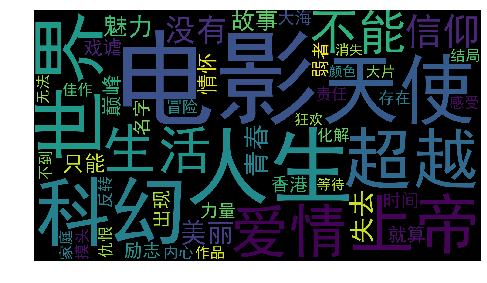

In [103]:
show_img(wc)

In [75]:
help(str.strip)

Help on method_descriptor:

strip(...)
    S.strip([chars]) -> str
    
    Return a copy of the string S with leading and trailing
    whitespace removed.
    If chars is given and not None, remove characters in chars instead.



In [76]:
help(str.replace)

Help on method_descriptor:

replace(...)
    S.replace(old, new[, count]) -> str
    
    Return a copy of S with all occurrences of substring
    old replaced by new.  If the optional argument count is
    given, only the first count occurrences are replaced.



In [81]:
movie_data

,rank,movie_name,director,main_actor,score,year,type,country,language,Introduction,review,star_five,star_four,star_three,star_two,star_one,avg_star
0,,,,,,,,,,,,,,,,,
1,1,肖申克的救赎,弗兰克·德拉邦特,蒂姆·罗宾斯 / 摩根·弗里曼 / 鲍勃·冈顿 / 威廉姆·赛德勒 / 克兰西·布朗 / ...,9.6,1994,剧情 / 犯罪,美国,英语,20世纪40年代末，小有成就的青年银行家安迪（蒂姆·罗宾斯TimRobbins饰）因涉嫌杀害...,918864,82.2%,15.6%,2.0%,0.1%,0.1%,4.797
2,2,霸王别姬,陈凯歌,张国荣 / 张丰毅 / 巩俐 / 葛优 / 英达 / 蒋雯丽 / 吴大维 / 吕齐 / 雷...,9.5,1993,剧情 / 爱情 / 同性,中国大陆 / 香港,汉语普通话,段小楼（张丰毅）与程蝶衣（张国荣）是一对打小一起长大的师兄弟，两人一个演生，一个饰旦，一向配...,663075,79.4%,17.7%,2.7%,0.2%,0.1%,4.764
3,3,这个杀手不太冷,吕克·贝松,让·雷诺 / 娜塔莉·波特曼 / 加里·奥德曼 / 丹尼·爱罗 / 彼得·阿佩尔 / 迈克...,9.4,1994,剧情 / 动作 / 犯罪,法国,英语 / 意大利语 / 法语,里昂（让·雷诺饰）是名孤独的职业杀手，受人雇佣。一天，邻居家小姑娘马蒂尔达（纳塔丽·波特曼饰...,872569,73.8%,22.5%,3.4%,0.2%,0.1%,4.697
4,4,阿甘正传,罗伯特·泽米吉斯,汤姆·汉克斯 / 罗宾·怀特 / 加里·西尼斯 / 麦凯尔泰·威廉逊 / 莎莉·菲尔德 /...,9.4,1994,剧情 / 爱情,美国,英语,阿甘（汤姆·汉克斯饰）于二战结束后不久出生在美国南方阿拉巴马州一个闭塞的小镇，他先天弱智，智...,742289,73.9%,22.2%,3.5%,0.2%,0.1%,4.693
5,5,美丽人生,罗伯托·贝尼尼,罗伯托·贝尼尼 / 尼可莱塔·布拉斯基 / 乔治·坎塔里尼 / 朱斯蒂诺·杜拉诺 / 赛尔...,9.5,1997,剧情 / 喜剧 / 爱情 / 战争,意大利,意大利语 / 德语 / 英语,犹太青年圭多（罗伯托·贝尼尼）邂逅美丽的女教师多拉（尼可莱塔·布拉斯基），他彬彬有礼的向多拉...,433458,77.5%,19.3%,2.9%,0.2%,0.1%,4.739
6,6,千与千寻,宫崎骏,柊瑠美 / 入野自由 / 夏木真理 / 菅原文太 / 内藤刚志 / 神木隆之介 / 泽口靖...,9.2,2001,剧情 / 动画 / 奇幻,日本,日语,千寻和爸爸妈妈一同驱车前往新家，在郊外的小路上不慎进入了神秘的隧道——他们去到了另外一个诡异...,692523,67.5%,27.2%,5.0%,0.2%,0.1%,4.618
7,7,辛德勒的名单,史蒂文·斯皮尔伯格,连姆·尼森 / 本·金斯利 / 拉尔夫·费因斯 / 卡罗琳·古多尔 / 乔纳森·萨加尔 /...,9.4,1993,剧情 / 历史 / 战争,美国,英语 / 希伯来语 / 德语 / 波兰语,1939年，波兰在纳粹德国的统治下，党卫军对犹太人进行了隔离统治。德国商人奥斯卡·辛德勒（连...,398276,74.5%,22.0%,3.2%,0.2%,0.1%,4.706
8,8,泰坦尼克号,詹姆斯·卡梅隆,莱昂纳多·迪卡普里奥 / 凯特·温丝莱特 / 比利·赞恩 / 凯西·贝茨 / 弗兰西丝·费...,9.2,1997,剧情 / 爱情 / 灾难,美国,英语 / 意大利语 / 德语 / 俄语,1912年4月10日，号称“世界工业史上的奇迹”的豪华客轮泰坦尼克号开始了自己的处女航，从英...,682590,67.6%,26.2%,5.7%,0.3%,0.1%,4.606
9,9,盗梦空间,克里斯托弗·诺兰,莱昂纳多·迪卡普里奥 / 约瑟夫·高登-莱维特 / 艾伦·佩吉 / 汤姆·哈迪 / 渡边谦...,9.3,2010,剧情 / 动作 / 科幻 / 悬疑 / 冒险,美国 / 英国,英语 / 日语 / 法语,道姆·柯布（莱昂纳多·迪卡普里奥LeonardoDiCaprio饰）与同事阿瑟（约瑟夫·戈登...,791423,68.2%,26.8%,4.7%,0.3%,0.1%,4.630
